# Stock Market Prediction using CNN-LSTM model
This project is about analysis of Stock Market and providing predictions to the stockholders. For this, we used CNN-LSTM approach to create a blank model, then use it to train on stock market data. Further implementation is discussed below...

In [164]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [165]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Before preprocessing data, a function to fetch real-time stock data (using Alpha Vantage API) is made

Then the datasets are loaded

In [166]:
data = pd.read_csv('adani.csv')
data.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,26-Apr-2024,EQ,"1,340.00","1,341.60","1,321.10","1,330.55","1,326.25","1,324.60","1,328.85","1,424.95",656.0,"25,65,490","3,40,91,41,234.35","75,100"
1,25-Apr-2024,EQ,"1,320.50","1,336.95","1,316.80","1,320.50","1,328.25","1,330.55","1,328.29","1,424.95",656.0,"60,97,087","8,09,86,85,271.80","1,65,345"
2,24-Apr-2024,EQ,"1,331.00","1,332.90","1,318.05","1,322.10","1,319.00","1,320.50","1,326.09","1,424.95",656.0,"25,53,035","3,38,55,41,706.00","1,05,611"
3,23-Apr-2024,EQ,"1,321.10","1,338.55","1,318.90","1,321.10","1,321.00","1,322.10","1,328.53","1,424.95",656.0,"38,47,872","5,11,20,08,891.80","1,15,321"
4,22-Apr-2024,EQ,"1,321.10","1,331.00","1,315.00","1,310.00","1,323.25","1,321.10","1,320.54","1,424.95",656.0,"89,03,130","11,75,69,23,627.80","67,598"


In [167]:
data.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           249 non-null    object 
 1   series         249 non-null    object 
 2   OPEN           249 non-null    object 
 3   HIGH           249 non-null    object 
 4   LOW            249 non-null    object 
 5   PREV. CLOSE    249 non-null    object 
 6   ltp            249 non-null    object 
 7   close          249 non-null    object 
 8   vwap           249 non-null    object 
 9   52W H          249 non-null    object 
 10  52W L          249 non-null    float64
 11  VOLUME         249 non-null    object 
 12  VALUE          249 non-null    object 
 13  No of trades   249 non-null    object 
dtypes: float64(1), object(13)
memory usage: 27.4+ KB


In [169]:
data.shape

(249, 14)

In [170]:
# Rename columns
data.rename(columns={"Date ":"date","OPEN ":"open","HIGH ":"high","LOW ":"low","close ":"close", "PREV. close ":"prev.close","52W H ":"52wh", "52W L ":"52wl" ,"VOLUME ":"volume" , "VALUE ":"value","No of trades ":"no.oftrade"}, inplace= True)
data.head()

,date,series,open,high,low,PREV. CLOSE,ltp,close,vwap,52wh,52wl,volume,value,no.oftrade
0,26-Apr-2024,EQ,"1,340.00","1,341.60","1,321.10","1,330.55","1,326.25","1,324.60","1,328.85","1,424.95",656.0,"25,65,490","3,40,91,41,234.35","75,100"
1,25-Apr-2024,EQ,"1,320.50","1,336.95","1,316.80","1,320.50","1,328.25","1,330.55","1,328.29","1,424.95",656.0,"60,97,087","8,09,86,85,271.80","1,65,345"
2,24-Apr-2024,EQ,"1,331.00","1,332.90","1,318.05","1,322.10","1,319.00","1,320.50","1,326.09","1,424.95",656.0,"25,53,035","3,38,55,41,706.00","1,05,611"
3,23-Apr-2024,EQ,"1,321.10","1,338.55","1,318.90","1,321.10","1,321.00","1,322.10","1,328.53","1,424.95",656.0,"38,47,872","5,11,20,08,891.80","1,15,321"
4,22-Apr-2024,EQ,"1,321.10","1,331.00","1,315.00","1,310.00","1,323.25","1,321.10","1,320.54","1,424.95",656.0,"89,03,130","11,75,69,23,627.80","67,598"


In [171]:
data.describe()


,52wl
count,249.000000
mean,436.021285
std,80.099537
min,395.100000
25%,395.100000
50%,395.100000
75%,395.100000
max,656.000000


In [172]:
data.isnull().sum()

date            0
series          0
open            0
high            0
low             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52wh            0
52wl            0
volume          0
value           0
no.oftrade      0
dtype: int64

Filling null columns with mean values....

In [173]:
#data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()

,date,series,open,high,low,PREV. CLOSE,ltp,close,vwap,52wh,52wl,volume,value,no.oftrade
0,26-Apr-2024,EQ,"1,340.00","1,341.60","1,321.10","1,330.55","1,326.25","1,324.60","1,328.85","1,424.95",656.0,"25,65,490","3,40,91,41,234.35","75,100"
1,25-Apr-2024,EQ,"1,320.50","1,336.95","1,316.80","1,320.50","1,328.25","1,330.55","1,328.29","1,424.95",656.0,"60,97,087","8,09,86,85,271.80","1,65,345"
2,24-Apr-2024,EQ,"1,331.00","1,332.90","1,318.05","1,322.10","1,319.00","1,320.50","1,326.09","1,424.95",656.0,"25,53,035","3,38,55,41,706.00","1,05,611"
3,23-Apr-2024,EQ,"1,321.10","1,338.55","1,318.90","1,321.10","1,321.00","1,322.10","1,328.53","1,424.95",656.0,"38,47,872","5,11,20,08,891.80","1,15,321"
4,22-Apr-2024,EQ,"1,321.10","1,331.00","1,315.00","1,310.00","1,323.25","1,321.10","1,320.54","1,424.95",656.0,"89,03,130","11,75,69,23,627.80","67,598"


In [174]:
data.columns

Index(['date', 'series ', 'open', 'high', 'low', 'PREV. CLOSE ', 'ltp ',
       'close', 'vwap ', '52wh', '52wl', 'volume', 'value', 'no.oftrade'],
      dtype='object')

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          249 non-null    object 
 1   series        249 non-null    object 
 2   open          249 non-null    object 
 3   high          249 non-null    object 
 4   low           249 non-null    object 
 5   PREV. CLOSE   249 non-null    object 
 6   ltp           249 non-null    object 
 7   close         249 non-null    object 
 8   vwap          249 non-null    object 
 9   52wh          249 non-null    object 
 10  52wl          249 non-null    float64
 11  volume        249 non-null    object 
 12  value         249 non-null    object 
 13  no.oftrade    249 non-null    object 
dtypes: float64(1), object(13)
memory usage: 27.4+ KB


In [176]:
# Checking Data type of each column
print("Date column data type: ", type(data['date'][0]))
print("open column data type: ", type(data['open'][0]))
print("close column data type: ", type(data['close'][0]))
print("High column data type: ", type(data['high'][0]))
print("Low column data type: ", type(data['low'][0]))


data['open'] = data['open'].str.replace(',', '')
data['open'] = data['open'].astype(float)

data['open'] = data['open'].astype(float)


data['close'] = data['close'].str.replace(',', '')
data['close'] = data['close'].astype(float)

data['close'] = data['close'].astype(float)


data['high'] = data['high'].str.replace(',', '')
data['high'] = data['high'].astype(float)

data['high'] = data['high'].astype(float)


data['low'] = data['low'].str.replace(',', '')
data['low'] = data['low'].astype(float)
data['low'] = data['low'].astype(float)

Date column data type:  <class 'str'>
open column data type:  <class 'str'>
close column data type:  <class 'str'>
High column data type:  <class 'str'>
Low column data type:  <class 'str'>


In [177]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          249 non-null    object 
 1   series        249 non-null    object 
 2   open          249 non-null    float64
 3   high          249 non-null    float64
 4   low           249 non-null    float64
 5   PREV. CLOSE   249 non-null    object 
 6   ltp           249 non-null    object 
 7   close         249 non-null    float64
 8   vwap          249 non-null    object 
 9   52wh          249 non-null    object 
 10  52wl          249 non-null    float64
 11  volume        249 non-null    object 
 12  value         249 non-null    object 
 13  no.oftrade    249 non-null    object 
dtypes: float64(5), object(9)
memory usage: 27.4+ KB


In [178]:
data.columns

Index(['date', 'series ', 'open', 'high', 'low', 'PREV. CLOSE ', 'ltp ',
       'close', 'vwap ', '52wh', '52wl', 'volume', 'value', 'no.oftrade'],
      dtype='object')

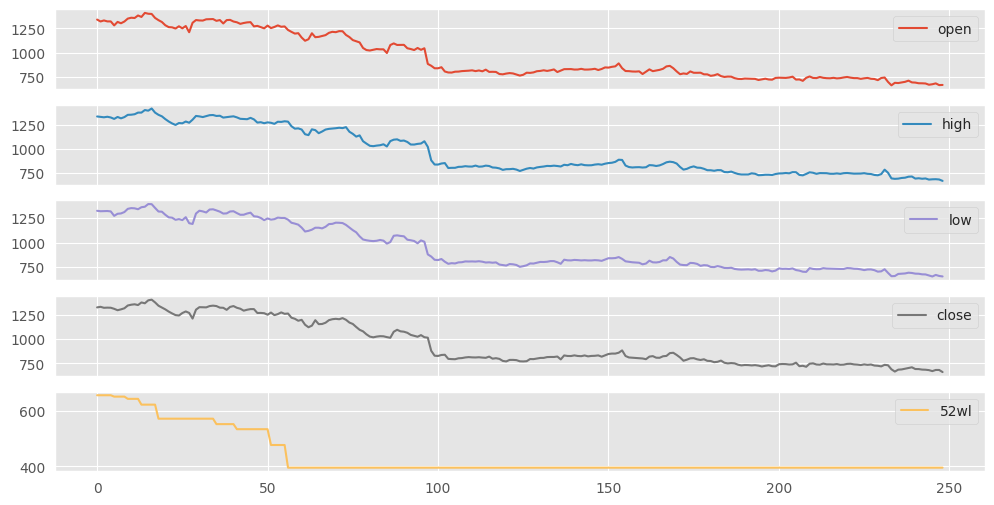

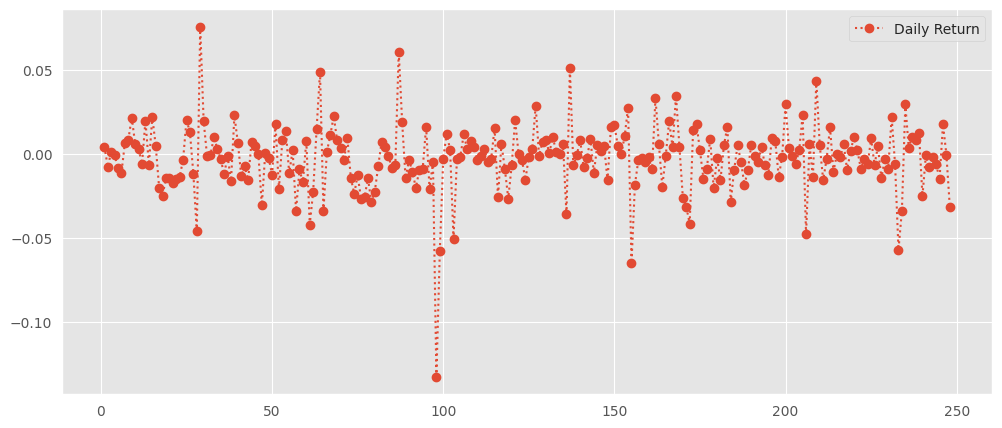

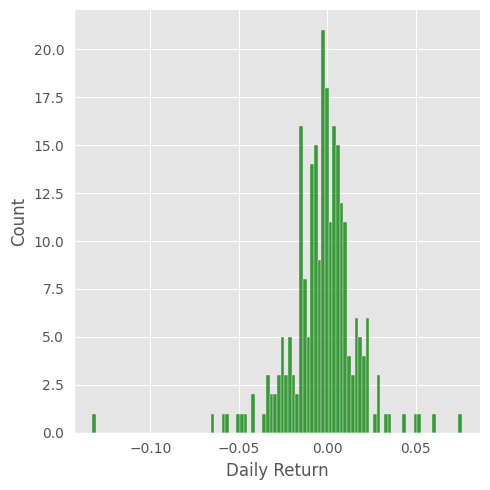

            date series     open     high      low PREV. CLOSE       ltp   \
0    26-Apr-2024      EQ  1340.0  1341.60  1321.10     1,330.55  1,326.25   
1    25-Apr-2024      EQ  1320.5  1336.95  1316.80     1,320.50  1,328.25   
2    24-Apr-2024      EQ  1331.0  1332.90  1318.05     1,322.10  1,319.00   
3    23-Apr-2024      EQ  1321.1  1338.55  1318.90     1,321.10  1,321.00   
4    22-Apr-2024      EQ  1321.1  1331.00  1315.00     1,310.00  1,323.25   
..           ...     ...     ...      ...      ...          ...       ...   
244  04-May-2023      EQ   670.0   682.00   667.70       669.65    680.15   
245  03-May-2023      EQ   675.0   684.85   656.75       681.50    668.00   
246  02-May-2023      EQ   683.8   685.90   672.60       681.30    681.00   
247  28-Apr-2023      EQ   666.2   683.00   662.15       659.75    681.00   
248  27-Apr-2023      EQ   667.9   668.20   657.20       664.70    659.55   

       close     vwap       52wh   52wl     volume               value  \
0

date                0
series              0
open                0
high                0
low                 0
PREV. CLOSE         0
ltp                 0
close               0
vwap                0
52wh                0
52wl                0
volume              0
value               0
no.oftrade          0
MA for 10 days      9
MA for 50 days     49
MA for 100 days    99
Daily Return        1
dtype: int64

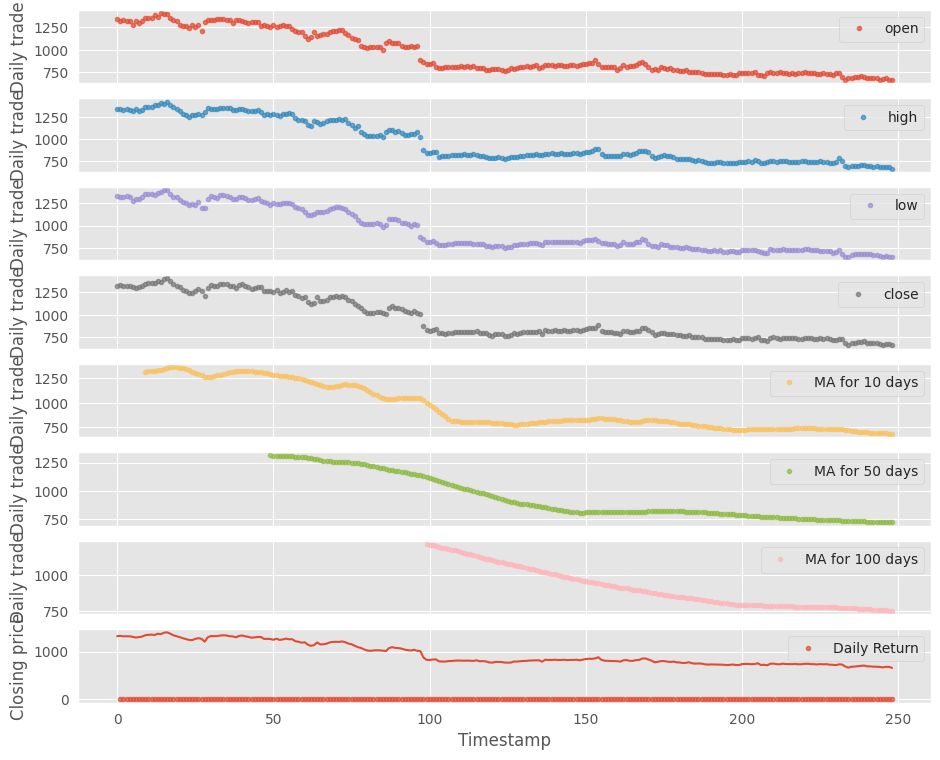

In [179]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['close'],ma).mean()

data['Daily Return'] = data['close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['date'])
closing_df1 = pd.DataFrame(data['close'])
close1  = closing_df1.rename(columns={"close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

#data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['open', 'high', 'low','close','volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['close'], label="close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

After that, we'll visualize the data for understanding, this is shown below...

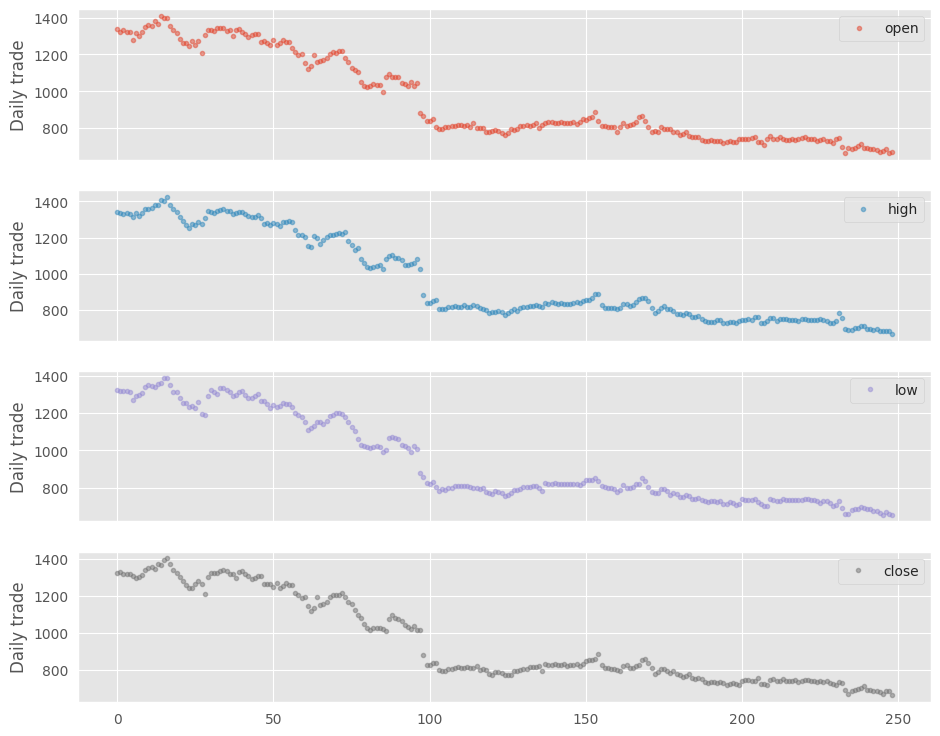

In [180]:
cols_plot = ['open', 'high', 'low','close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Then we'd print the data after making changes and dropping null data

            date series     open     high      low PREV. CLOSE       ltp   \
0    26-Apr-2024      EQ  1340.0  1341.60  1321.10     1,330.55  1,326.25   
1    25-Apr-2024      EQ  1320.5  1336.95  1316.80     1,320.50  1,328.25   
2    24-Apr-2024      EQ  1331.0  1332.90  1318.05     1,322.10  1,319.00   
3    23-Apr-2024      EQ  1321.1  1338.55  1318.90     1,321.10  1,321.00   
4    22-Apr-2024      EQ  1321.1  1331.00  1315.00     1,310.00  1,323.25   
..           ...     ...     ...      ...      ...          ...       ...   
244  04-May-2023      EQ   670.0   682.00   667.70       669.65    680.15   
245  03-May-2023      EQ   675.0   684.85   656.75       681.50    668.00   
246  02-May-2023      EQ   683.8   685.90   672.60       681.30    681.00   
247  28-Apr-2023      EQ   666.2   683.00   662.15       659.75    681.00   
248  27-Apr-2023      EQ   667.9   668.20   657.20       664.70    659.55   

       close     vwap       52wh   52wl     volume               value  \
0

,count,mean,std,min,25%,50%,75%,max
open,249.0,951.203815,236.351398,664.000000,752.950000,825.800000,1203.600000,1408.600000
high,249.0,963.956225,239.335331,668.200000,760.800000,832.000000,1217.200000,1424.950000
low,249.0,938.493574,232.319771,656.750000,741.950000,815.000000,1188.100000,1389.200000
close,249.0,950.429719,235.737402,659.750000,752.650000,823.100000,1202.950000,1404.150000
52wl,249.0,436.021285,80.099537,395.100000,395.100000,395.100000,395.100000,656.000000
MA for 10 days,240.0,948.638958,229.979901,683.125000,758.320000,821.200000,1182.600000,1366.315000
MA for 50 days,200.0,934.688640,198.512023,719.433000,787.787250,818.282000,1122.034000,1314.724000
MA for 100 days,150.0,914.742543,140.545590,753.891500,788.143625,870.172000,1024.194125,1217.286500
Daily Return,248.0,-0.002606,0.019903,-0.132711,-0.011524,-0.001473,0.006907,0.075855


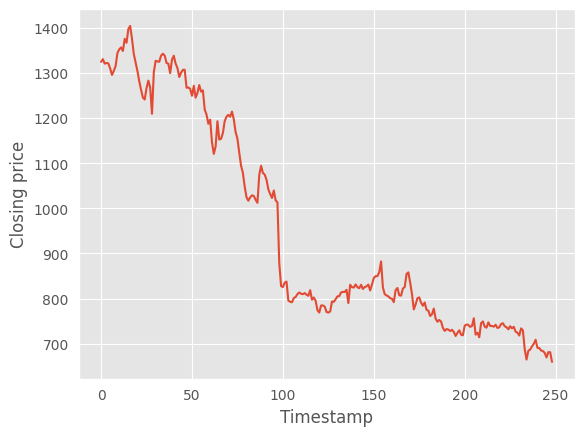

In [181]:
plt.plot(data['close'], label="close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

The data has been analysed but it must be converted into data of shape [100,1] to make it easier for CNN to train on... Else it won't select necessary features and the model will fail

Window Length: 20
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0222
Variance: 0.8552578010213521
R2 Score: 0.7892666261366282
Max Error: 0.11094070189833469
Window Length: 30
2/2 [==============================] - 0s 13ms/step - loss: 8.3591e-04 - mse: 8.3591e-04 - mae: 0.0232
Variance: 0.9234372814468279
R2 Score: 0.9154730438533945
Max Error: 0.06636296869989708
Window Length: 40
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0294
Variance: 0.8937283643882677
R2 Score: 0.8933357980261108
Max Error: 0.08194037518681138
Window Length: 50
2/2 [==============================] - 2s 15ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0367
Variance: 0.8988687012923526
R2 Score: 0.8334506117400411
Max Error: 0.14399426257557035
Window Length: 60
2/2 [==============================] - 0s 11ms/step - loss: 5.1356e-04 - mse: 5.1356e-04 - mae: 0.0155
Variance: 0.9580751210556737
R2 Score: 0.9579522674328781
Max E

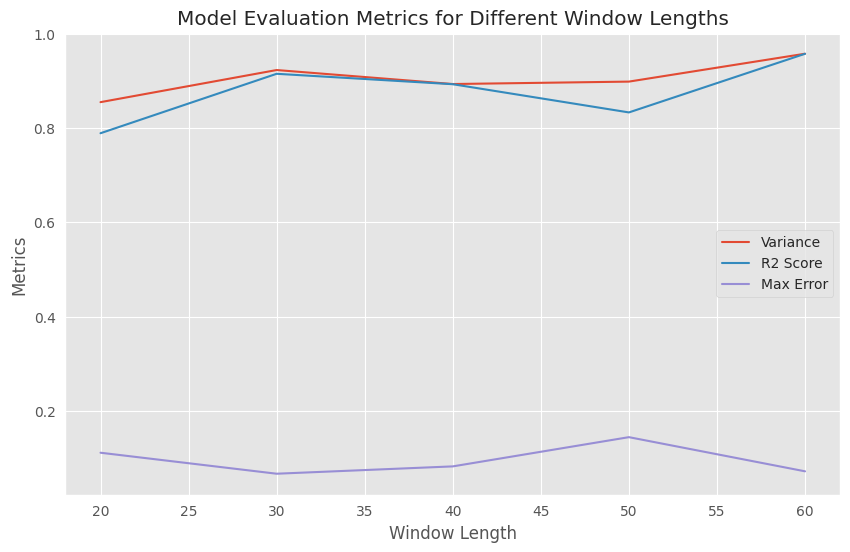

In [182]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy, RootMeanSquaredError
from sklearn.metrics import explained_variance_score, r2_score, max_error

# Function to create and train the model
def create_and_train_model(window_size):
    X = []
    Y = []
    for i in range(1, len(df) - window_size - 1, 1):
        first = df.iloc[i, 2]
        temp = []
        temp2 = []
        for j in range(window_size):
            temp.append((df.iloc[i + j, 2] - first) / first)
        temp2.append((df.iloc[i + window_size, 2] - first) / first)
        X.append(np.array(temp).reshape(window_size, 1))
        Y.append(np.array(temp2).reshape(1, 1))

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

    train_X = np.array(x_train)
    test_X = np.array(x_test)
    train_Y = np.array(y_train)
    test_Y = np.array(y_test)

    train_X = train_X.reshape(train_X.shape[0], 1, window_size, 1)
    test_X = test_X.reshape(test_X.shape[0], 1, window_size, 1)

    model = tf.keras.Sequential()

    # CNN layers
    model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(None, window_size, 1))))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Flatten()))

    # LSTM layers
    model.add(Bidirectional(LSTM(100, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(100, return_sequences=False)))
    model.add(Dropout(0.5))

    # Final layers
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

    history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=40, batch_size=40, verbose=0, shuffle=True)

    model.evaluate(test_X, test_Y)

    # Predict probabilities for test set
    yhat_probs = model.predict(test_X, verbose=0)
    # Reduce to 1d array
    yhat_probs = yhat_probs[:, 0]

    var = explained_variance_score(test_Y.reshape(-1, 1), yhat_probs)
    r2 = r2_score(test_Y.reshape(-1, 1), yhat_probs)
    var2 = max_error(test_Y.reshape(-1, 1), yhat_probs)

    return var, r2, var2 , model

# List of window lengths to iterate over
window_lengths = [20,30,40,50,60]

# Dictionary to store metrics for each window length
metrics = {}

# Iterate over window lengths and train models
# Iterate over window lengths and train models
# Iterate over window lengths and train models
for window_length in window_lengths:
    print(f"Window Length: {window_length}")
    var, r2, var2, model = create_and_train_model(window_length)
    print(f"Variance: {var}")
    print(f"R2 Score: {r2}")
    print(f"Max Error: {var2}")
    metrics[window_length] = {'Variance': var, 'R2 Score': r2, 'Max Error': var2}


# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.plot(window_lengths, [metrics[length]['Variance'] for length in window_lengths], label='Variance')
plt.plot(window_lengths, [metrics[length]['R2 Score'] for length in window_lengths], label='R2 Score')
plt.plot(window_lengths, [metrics[length]['Max Error'] for length in window_lengths], label='Max Error')
plt.xlabel("Window Length")
plt.ylabel("Metrics")
plt.title("Model Evaluation Metrics for Different Window Lengths")
plt.legend()
plt.show()


# Training part

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_168 (Time  (None, 1, 60, 64)         256       
 Distributed)                                                    
                                                                 
 time_distributed_169 (Time  (None, 1, 30, 64)         0         
 Distributed)                                                    
                                                                 
 time_distributed_170 (Time  (None, 1, 28, 128)        24704     
 Distributed)                                                    
                                                                 
 time_distributed_171 (Time  (None, 1, 14, 128)        0         
 Distributed)                                                    
                                                                 
 time_distributed_172 (Time  (None, 1, 12, 64)       

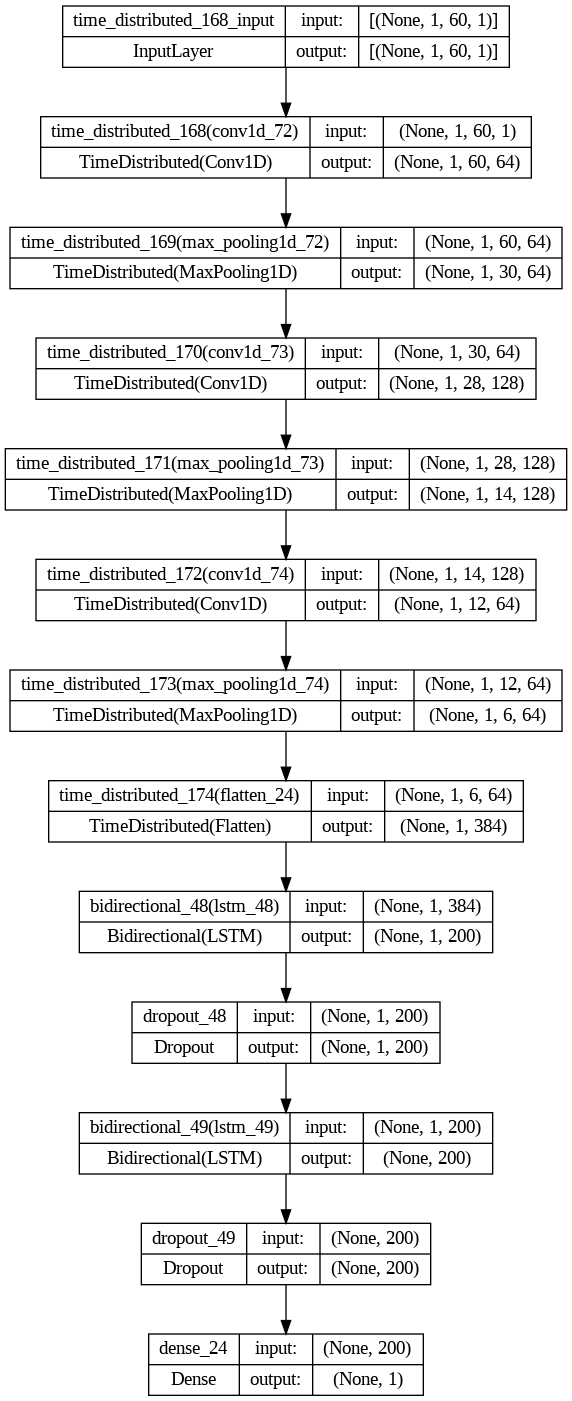

In [183]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

**SVM**

In [184]:
#using svm to predict stock
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm,preprocessing
from sklearn.metrics import classification_report

In [185]:
def get_x_and_y(price,window_length=7,predict_day_length=1):
    '''get train and test set
    every time get window from price and
    '''
    m = len(price.iloc[0])
    n = len(price) - window_length
    m = window_length * m

    x = np.ones((n,m))
    y = np.ones((n,1))

    for i in range(len(price)-window_length):
        #ans = [float(price.iloc[j,4]) for j in range(i,i+window_length)]
        ans = [list(price.iloc[j].tolist() for j in range(i,i+window_length))]
        #ans = [list(price.iloc[j] for j in range(i,i+window_length))]
        ans = np.array(ans).flatten()
        x[i] = ans
        y[i] = 1 if price.close[i+window_length+predict_day_length-1] - price.close[i+window_length-1] >0 else 0
    return [x,y]

In [186]:
def get_x_and_y(price, window_length, predict_day_length):
    x = np.zeros((len(price) - window_length - predict_day_length + 1, window_length))
    y = np.zeros((len(price) - window_length - predict_day_length + 1))
    for i in range(len(price) - window_length - predict_day_length + 1):
        ans = [float(price.index[i+j]) for j in range(window_length)]
        ans = np.array(ans).flatten()
        x[i] = ans
        y[i] = 1 if price.close[i+window_length+predict_day_length-1] - price.close[i+window_length-1] >0 else 0
    return [x,y]

In [187]:
!pip install sklearn
import sklearn.preprocessing

window_lengths = [20,30,40,50,60]
accurarys = {}
reports ={}

def train_and_test(price, window_length, accurarys, reports):
    x,y = get_x_and_y(data,window_length,predict_day_length=1)
    y = y.flatten()
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=233)
    for kernel_arg in ['rbf','poly','linear']:
        clf = svm.SVC(kernel=kernel_arg,max_iter=5000)
        clf.fit(x_train,y_train)
        y_predict = clf.predict(x_test)

        accurary = clf.score(x_test,y_test)
        report = classification_report(y_test,y_predict,target_names = ['drop','up'])
        if window_length in accurarys:
            accurarys[window_length].append(accurary)
            reports[window_length].append(report)
        else:
            accurarys[window_length] = [accurary]
            reports[window_length] = [report]
        print('The Accurary of %s : %f'%(kernel_arg,clf.score(x_test,y_test)))
        print(report)

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [188]:
for l in window_lengths:
    print('window_length:',l)
    train_and_test(data,l,accurarys,reports)

window_length: 20
The Accurary of rbf : 0.620690
              precision    recall  f1-score   support

        drop       0.62      1.00      0.77        36
          up       0.00      0.00      0.00        22

    accuracy                           0.62        58
   macro avg       0.31      0.50      0.38        58
weighted avg       0.39      0.62      0.48        58

The Accurary of poly : 0.620690
              precision    recall  f1-score   support

        drop       0.62      1.00      0.77        36
          up       0.00      0.00      0.00        22

    accuracy                           0.62        58
   macro avg       0.31      0.50      0.38        58
weighted avg       0.39      0.62      0.48        58

The Accurary of linear : 0.465517
              precision    recall  f1-score   support

        drop       0.62      0.36      0.46        36
          up       0.38      0.64      0.47        22

    accuracy                           0.47        58
   macro avg 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299

The Accurary of rbf : 0.560000
              precision    recall  f1-score   support

        drop       0.56      1.00      0.72        28
          up       0.00      0.00      0.00        22

    accuracy                           0.56        50
   macro avg       0.28      0.50      0.36        50
weighted avg       0.31      0.56      0.40        50

The Accurary of poly : 0.560000
              precision    recall  f1-score   support

        drop       0.56      1.00      0.72        28
          up       0.00      0.00      0.00        22

    accuracy                           0.56        50
   macro avg       0.28      0.50      0.36        50
weighted avg       0.31      0.56      0.40        50

The Accurary of linear : 0.420000
              precision    recall  f1-score   support

        drop       0.48      0.57      0.52        28
          up       0.29      0.23      0.26        22

    accuracy                           0.42        50
   macro avg       0.39      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

In [189]:
data

,date,series,open,high,low,PREV. CLOSE,ltp,close,vwap,52wh,52wl,volume,value,no.oftrade,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
0,26-Apr-2024,EQ,1340.0,1341.60,1321.10,"1,330.55","1,326.25",1324.60,"1,328.85","1,424.95",656.0,"25,65,490","3,40,91,41,234.35","75,100",NaN,NaN,NaN,NaN
1,25-Apr-2024,EQ,1320.5,1336.95,1316.80,"1,320.50","1,328.25",1330.55,"1,328.29","1,424.95",656.0,"60,97,087","8,09,86,85,271.80","1,65,345",NaN,NaN,NaN,0.004492
2,24-Apr-2024,EQ,1331.0,1332.90,1318.05,"1,322.10","1,319.00",1320.50,"1,326.09","1,424.95",656.0,"25,53,035","3,38,55,41,706.00","1,05,611",NaN,NaN,NaN,-0.007553
3,23-Apr-2024,EQ,1321.1,1338.55,1318.90,"1,321.10","1,321.00",1322.10,"1,328.53","1,424.95",656.0,"38,47,872","5,11,20,08,891.80","1,15,321",NaN,NaN,NaN,0.001212
4,22-Apr-2024,EQ,1321.1,1331.00,1315.00,"1,310.00","1,323.25",1321.10,"1,320.54","1,424.95",656.0,"89,03,130","11,75,69,23,627.80","67,598",NaN,NaN,NaN,-0.000756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,04-May-2023,EQ,670.0,682.00,667.70,669.65,680.15,679.75,674.08,987.85,395.1,"51,24,811","3,45,45,17,851.20","87,207",690.470,723.417,759.9880,-0.006068
245,03-May-2023,EQ,675.0,684.85,656.75,681.50,668.00,669.65,673.54,987.85,395.1,"56,45,727","3,80,26,02,342.35","82,651",688.975,722.466,758.4280,-0.014858
246,02-May-2023,EQ,683.8,685.90,672.60,681.30,681.00,681.50,679.76,987.85,395.1,"55,63,089","3,78,15,77,392.65","99,001",688.425,721.612,756.9725,0.017696
247,28-Apr-2023,EQ,666.2,683.00,662.15,659.75,681.00,681.30,675.79,987.85,395.1,"61,62,262","4,16,43,99,869.45","1,01,274",687.150,720.640,755.4745,-0.000293


**Random Forest**

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


accuracies = {}
reports = {}

def train_and_test_rf(price, window_length, accuracies, reports):
    x, y = get_x_and_y(price, window_length, predict_day_length=1)
    y = y.flatten()
    scaler = sklearn.preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=233)

    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    accuracy = clf.score(x_test, y_test)
    report = classification_report(y_test, y_predict, target_names=['drop', 'up'])

    if window_length in accuracies:
        accuracies[window_length].append(accuracy)
        reports[window_length].append(report)
    else:
        accuracies[window_length] = [accuracy]
        reports[window_length] = [report]

    print('The Accuracy of Random Forest: %f' % (accuracy))
    print(report)

for l in window_lengths:
    print('window_length:', l)
    train_and_test_rf(data, l, accuracies, reports)

window_length: 20
The Accuracy of Random Forest: 0.482759
              precision    recall  f1-score   support

        drop       0.60      0.50      0.55        36
          up       0.36      0.45      0.40        22

    accuracy                           0.48        58
   macro avg       0.48      0.48      0.47        58
weighted avg       0.51      0.48      0.49        58

window_length: 30
The Accuracy of Random Forest: 0.563636
              precision    recall  f1-score   support

        drop       0.65      0.61      0.62        33
          up       0.46      0.50      0.48        22

    accuracy                           0.56        55
   macro avg       0.55      0.55      0.55        55
weighted avg       0.57      0.56      0.57        55

window_length: 40
The Accuracy of Random Forest: 0.509434
              precision    recall  f1-score   support

        drop       0.53      0.61      0.57        28
          up       0.48      0.40      0.43        25

    accu

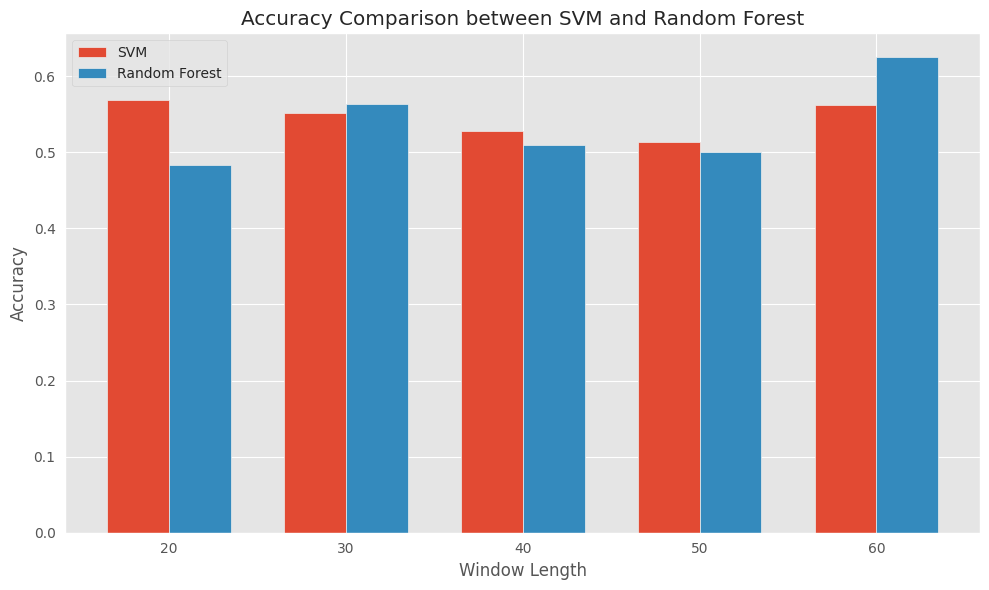

In [191]:
import matplotlib.pyplot as plt

# Assuming you have already executed both train_and_test functions for SVM and Random Forest and collected the accuracies

svm_accuracies = [np.mean(accurarys[window_length]) for window_length in window_lengths]
rf_accuracies = [np.mean(accuracies[window_length]) for window_length in window_lengths]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(window_lengths))

svm_bars = plt.bar(index, svm_accuracies, bar_width, label='SVM')
rf_bars = plt.bar(index + bar_width, rf_accuracies, bar_width, label='Random Forest')

plt.xlabel('Window Length')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between SVM and Random Forest')
plt.xticks(index + bar_width / 2, window_lengths)
plt.legend()

plt.tight_layout()
plt.show()


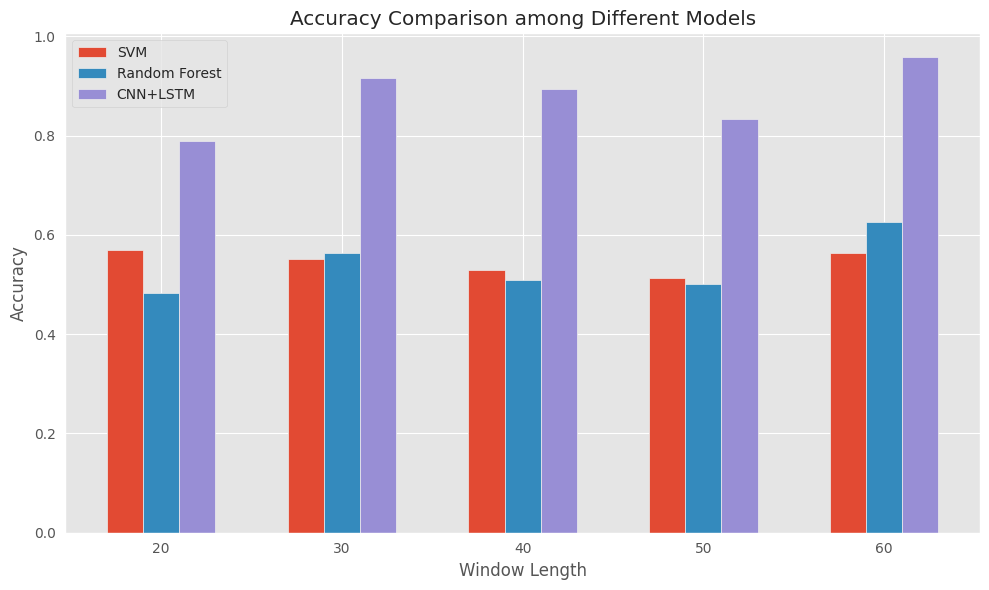

In [192]:
import matplotlib.pyplot as plt
import numpy as np

# Collect accuracies for all models
# Assuming you have collected accuracies for SVM, Random Forest, and CNN+LSTM models

# SVM accuracies
svm_accuracies = [np.mean(accurarys[window_length]) for window_length in window_lengths]

# Random Forest accuracies
rf_accuracies = [np.mean(accuracies[window_length]) for window_length in window_lengths]

# CNN+LSTM accuracies
cnn_lstm_accuracies = [metrics[window_length]['R2 Score'] for window_length in window_lengths]

# LSTM accuracies (if available)
# lstm_accuracies = [metrics_lstm[window_length]['Accuracy'] for window_length in window_lengths]

# Plotting the bar graph
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(window_lengths))

svm_bars = plt.bar(index, svm_accuracies, bar_width, label='SVM')
rf_bars = plt.bar(index + bar_width, rf_accuracies, bar_width, label='Random Forest')
cnn_lstm_bars = plt.bar(index + 2 * bar_width, cnn_lstm_accuracies, bar_width, label='CNN+LSTM')
# lstm_bars = plt.bar(index + 3 * bar_width, lstm_accuracies, bar_width, label='LSTM')

plt.xlabel('Window Length')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison among Different Models')
plt.xticks(index + bar_width, window_lengths)
plt.legend()

plt.tight_layout()
plt.show()


In [193]:
import pandas as pd

# Create an empty list to store accuracy dictionaries
accuracy_data = []

# Fill the accuracy data list with dictionaries for each window length
for window_length in window_lengths:
    cnn_lstm_acc = metrics[window_length]['R2 Score']  # Replace with appropriate CNN+LSTM accuracy metric
    svm_acc = sum(accurarys[window_length]) / len(accurarys[window_length])  # Average accuracy for SVM
    rf_acc = sum(accuracies[window_length]) / len(accuracies[window_length])  # Average accuracy for Random Forest
    accuracy_data.append({'Window Length': window_length,
                          'CNN+LSTM Accuracy': cnn_lstm_acc,
                          'SVM Accuracy': svm_acc,
                          'Random Forest Accuracy': rf_acc})

# Create a DataFrame from the accuracy data list
comparison_table = pd.DataFrame(accuracy_data)

# Print the comparison table
comparison_table


,Window Length,CNN+LSTM Accuracy,SVM Accuracy,Random Forest Accuracy
0,20,0.789267,0.568966,0.482759
1,30,0.915473,0.551515,0.563636
2,40,0.893336,0.528302,0.509434
3,50,0.833451,0.513333,0.500000
4,60,0.957952,0.562500,0.625000
